In [18]:
#Baltabayev Timur
#1. Basic Classification Methods
#Exercise 1: Implementing Basic Classification Algorithms

In [19]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score  

In [20]:
data = load_iris()  
X = data.data  #feature
y = data.target  #target

In [21]:
#training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
classifier = LogisticRegression(max_iter=200)  #increase max_iter if convergence issues occur

In [23]:
#train
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [24]:
#predictions
y_pred = classifier.predict(X_test)

In [25]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 1.0


In [26]:
#Baltabayev Timur
#1. Basic Classification Methods
#Exercise 2: Confusion Matrix and Classification Report

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
#matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [29]:
#report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [30]:
#Baltabayev Timur
#2. Clustering Techniques
#Exercise 3: Implementing K-Means Clustering

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # For generating a toy dataset
from sklearn.cluster import KMeans

In [32]:
#toy dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

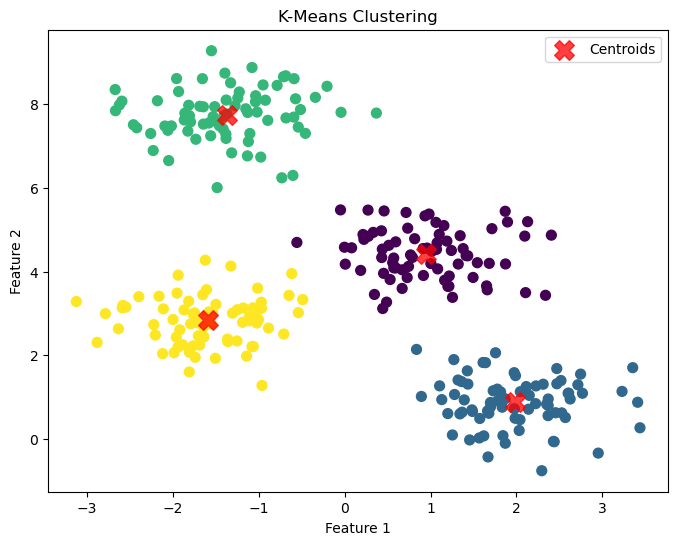

In [34]:
#clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [57]:
#Baltabayev Timur
#2. Clustering Techniques
#Exercise 4: Evaluating K-Means Clustering

In [61]:
inertia = []
k_values = range(1, 11)  #cluster counts from 1 to 10

In [63]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

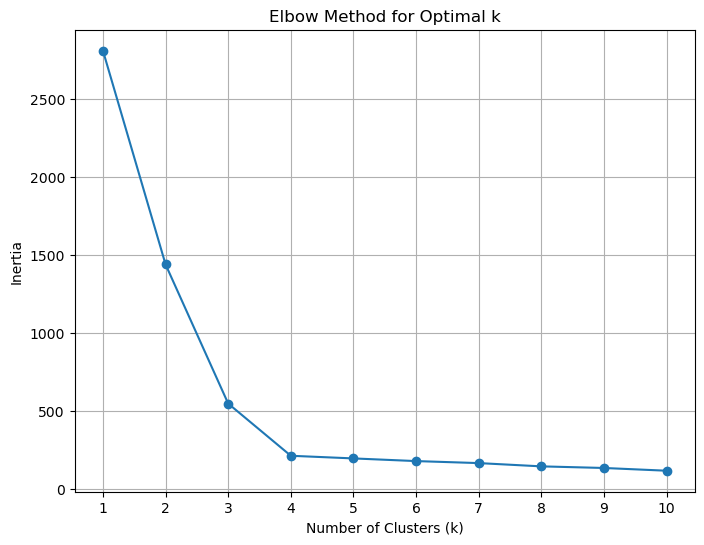

In [65]:
#inertia vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [67]:
#Baltabayev Timur
#3. Introduction to Advanced Clustering Techniques
#Exercise 5: Implementing Hierarchical Clustering

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
#toy dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [73]:
#K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

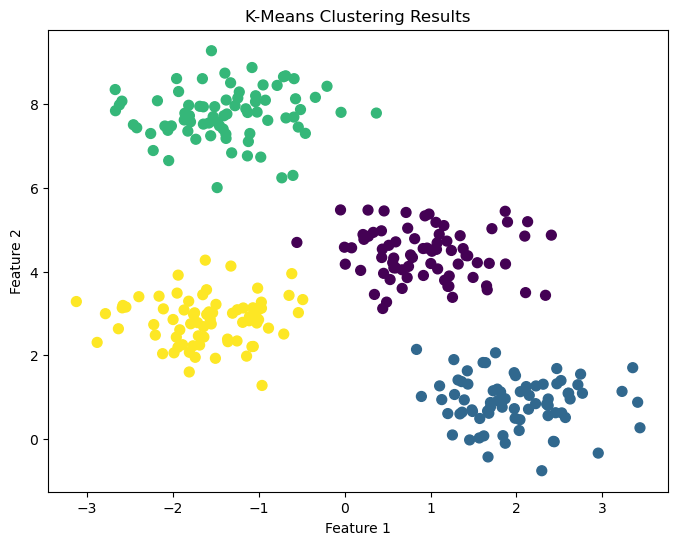

In [75]:
#K-Means Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [77]:
#Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)  # Set the number of clusters
y_agglo = agglo.fit_predict(X)

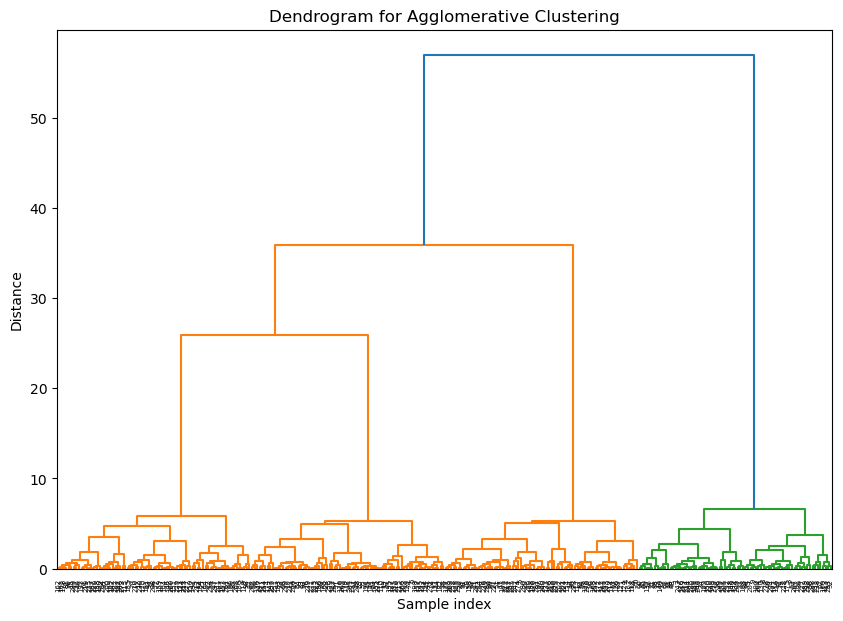

In [79]:
#dendrogram
linked = linkage(X, 'ward')  # Use the 'ward' method for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

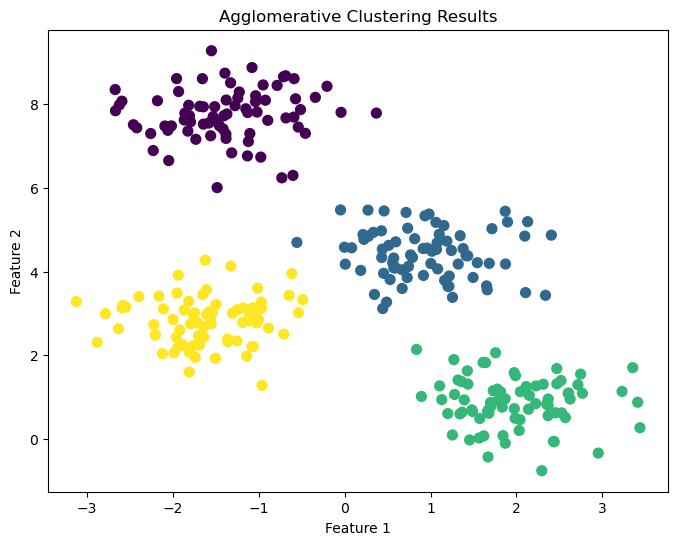

In [83]:
#Agglomerative Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='viridis')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [85]:
#Baltabayev Timur
#3. Introduction to Advanced Clustering Techniques
#Exercise 6: Introduction to DBSCAN

Text(0, 0.5, 'Feature 2')

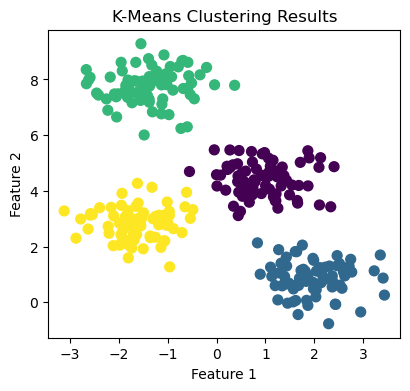

In [99]:
#K-Means Clustering results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [101]:
from sklearn.cluster import DBSCAN

In [103]:
#DBSCAN
#parameters: eps (epsilon) and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

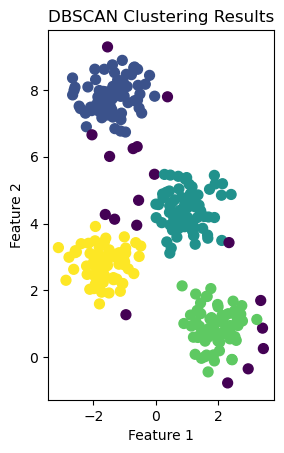

In [105]:
#DBSCAN Clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()